In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Downloads/vgsales.csv")

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
unique_values = data.nunique()
print(unique_values)

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64


In [6]:
unique_values_genre = data['Genre'].unique()
print(unique_values_genre)

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [7]:
data.dropna(how="any", inplace=True)

In [8]:
data.sort_values(by="Global_Sales", ascending=False, inplace=True)
data.reset_index(drop=True, inplace=True)
data["Rank"] = np.arange(1, len(data) + 1)

In [9]:
data["Year"] = data["Year"].astype(int)
data["Global_Sales"]= data["Global_Sales"].astype(float)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int32  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(2), object(4)
memory usage: 1.2+ MB


# VISUALIZATION

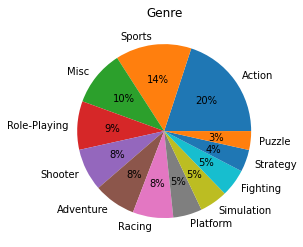

In [11]:
plt.pie(data.Genre.value_counts(), labels=data.Genre.value_counts().index, autopct='%1.0f%%')
plt.title('Genre')
plt.ylabel(' ')
plt.show()

Text(0.5, 1.0, 'Global_Sales as per Genre')

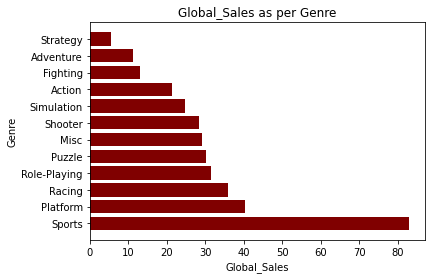

In [13]:
plt.barh(data.Genre,data.Global_Sales,color="maroon")
plt.xlabel('Global_Sales')
plt.ylabel('Genre')
plt.title('Global_Sales as per Genre')

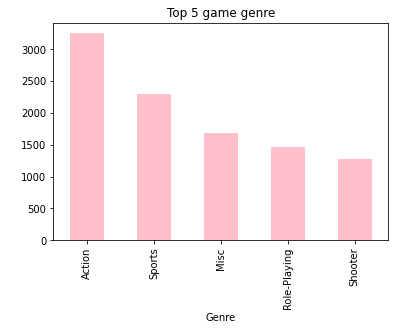

In [14]:
data.Genre.value_counts().head(5).plot(kind = 'bar', color = 'pink')
plt.xlabel('Genre')
plt.ylabel(' ')
plt.title('Top 5 game genre')
plt.show()

In [15]:
print(data["Year"].unique())

[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2003
 1986 2000 1995 2016 1991 1981 1987 1980 1983 2020 2017]


C:\Users\umrahzargar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Average Sales of the Game')

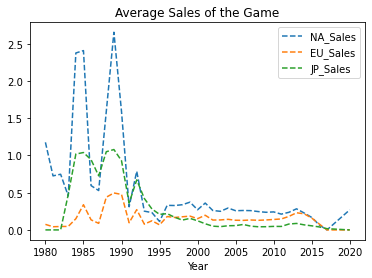

In [23]:
data_year= data.groupby(['Year'])
data_year = data_year['NA_Sales','EU_Sales','JP_Sales'].aggregate(np.mean)
data_year.plot( linestyle='dashed')
plt.title('Average Sales of the Game')

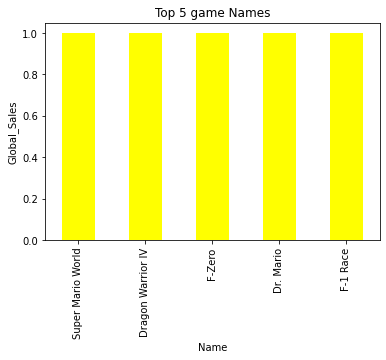

In [25]:
data=data[data.Year==1990]
data=data.sort_values('Global_Sales',ascending=False).head(5)
data.Name.value_counts().head(5).plot(kind = 'bar', color = 'yellow')
plt.xlabel('Name')
plt.ylabel('Global_Sales')
plt.title('Top 5 game Names')
plt.show()

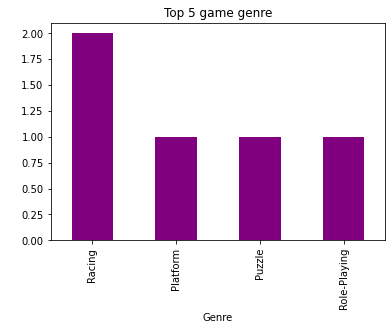

In [27]:
data.Genre.value_counts().head(5).plot(kind = 'bar', color = 'purple')
plt.xlabel('Genre')
plt.ylabel(' ')
plt.title('Top 5 game genre')
plt.show()

Text(0.5, 1.0, 'Game Sales Per Region from Publishers')

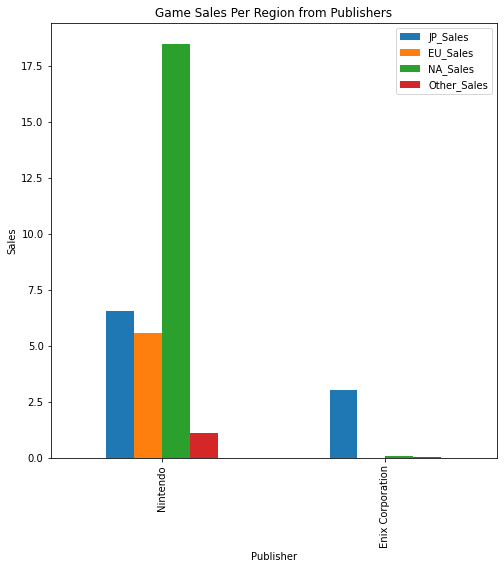

In [31]:
data=data.groupby('Publisher').agg({'JP_Sales':'sum','EU_Sales':'sum','NA_Sales':'sum','Other_Sales':'sum'})
data=data.sort_values('NA_Sales',ascending=False).head(3)
data.plot(kind='bar',figsize=(8,8))
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.title('Game Sales Per Region from Publishers')